# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

### Project Instructions

Identify the single feature that has the strongest predictive performance for classifying crop types.

* Find the feature in the dataset that produces the best score for predicting "crop".
* From this information, create a variable called best_predictive_feature, which:
    * Should be a dictionary containing the best predictive feature name as a key and the evaluation score (for the metric you chose) as the value.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv('soil_measures.csv')
print(crops)

        N   P   K        ph    crop
0      90  42  43  6.502985    rice
1      85  58  41  7.038096    rice
2      60  55  44  7.840207    rice
3      74  35  40  6.980401    rice
4      78  42  42  7.628473    rice
...   ...  ..  ..       ...     ...
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee

[2200 rows x 5 columns]


N       0
P       0
K       0
ph      0
crop    0
dtype: int64


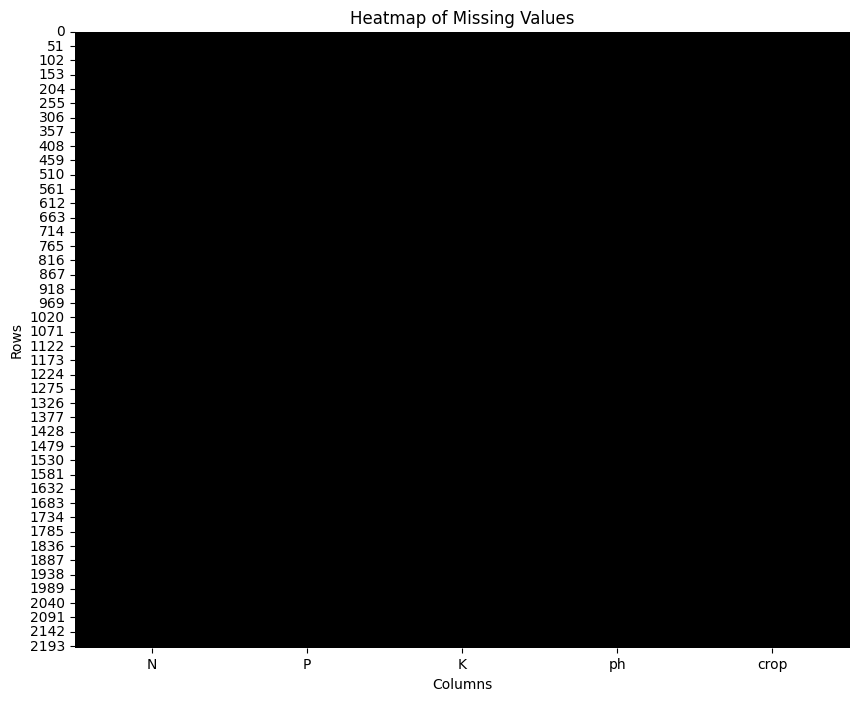

In [2]:
# Check for missing values
print(crops.isna().sum())

# Missing values
missing_values = crops.isna()

# Create a heatmap for missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(missing_values, cmap='gray_r', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Missing Values')
plt.show()

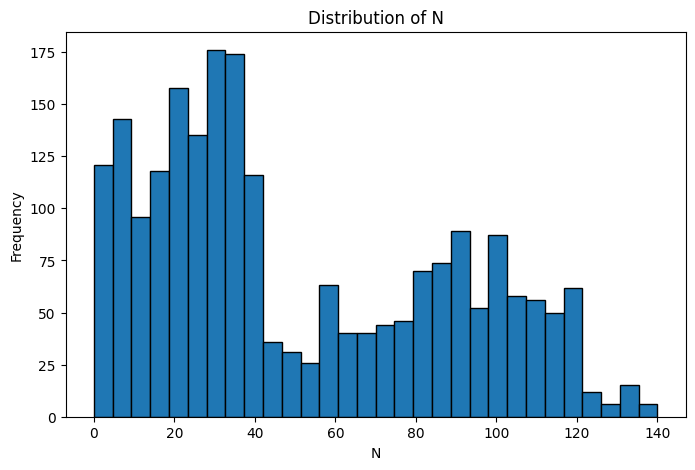

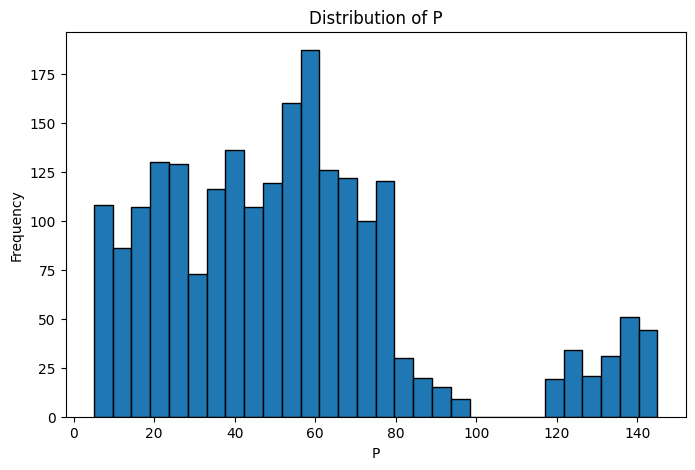

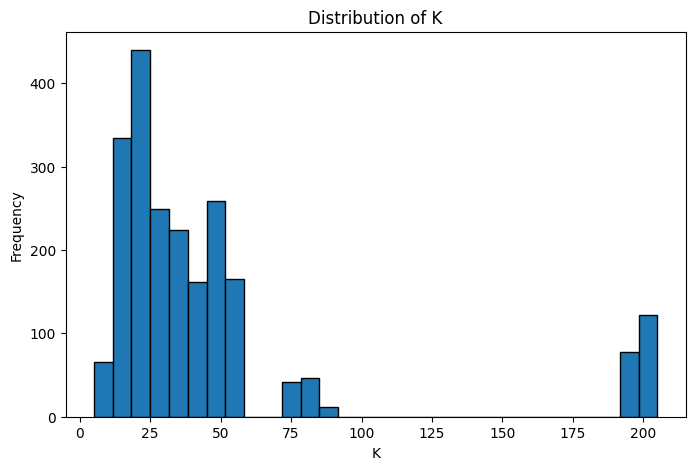

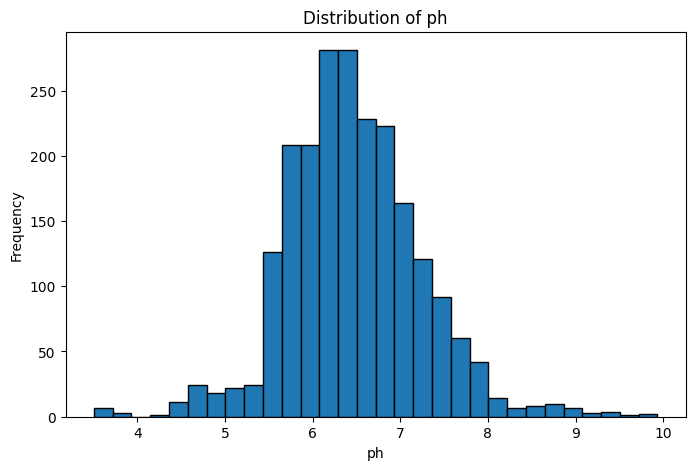

In [3]:
# Explore distribution of numeric columns
import matplotlib.pyplot as plt

num_columns = crops.select_dtypes(include=['int64', 'float64']).columns

for col in num_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(crops[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

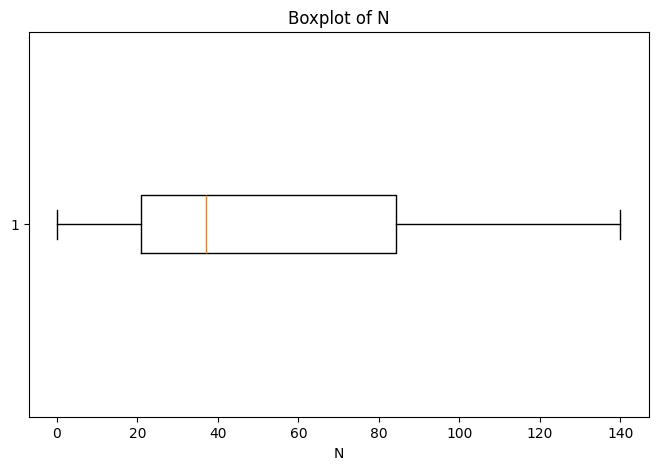

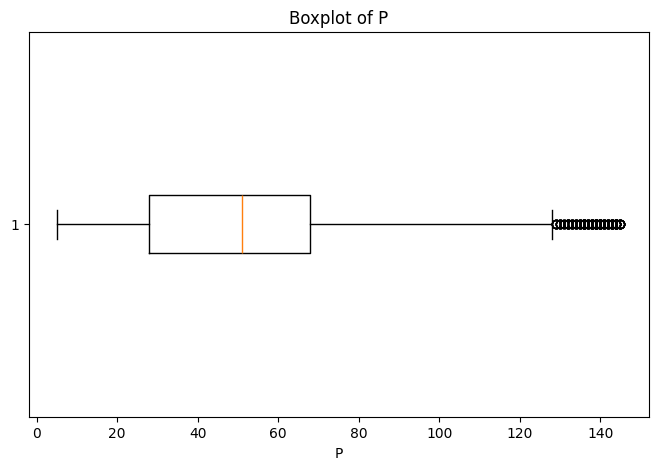

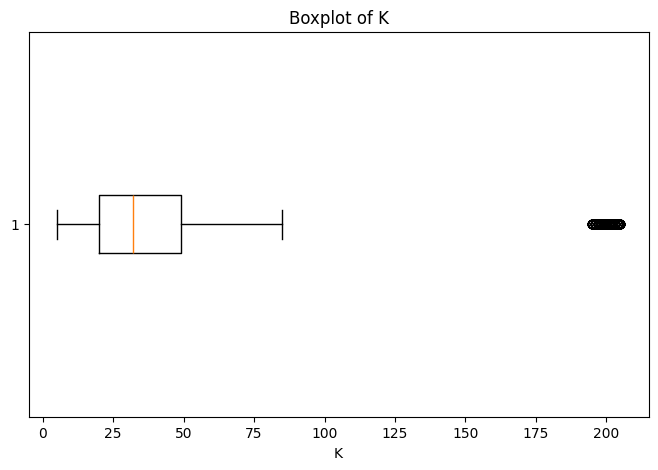

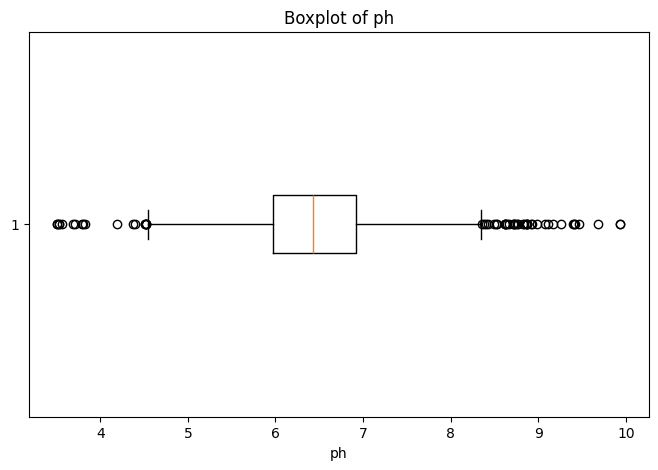

In [4]:
# identify outliers 
for col in num_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(crops[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

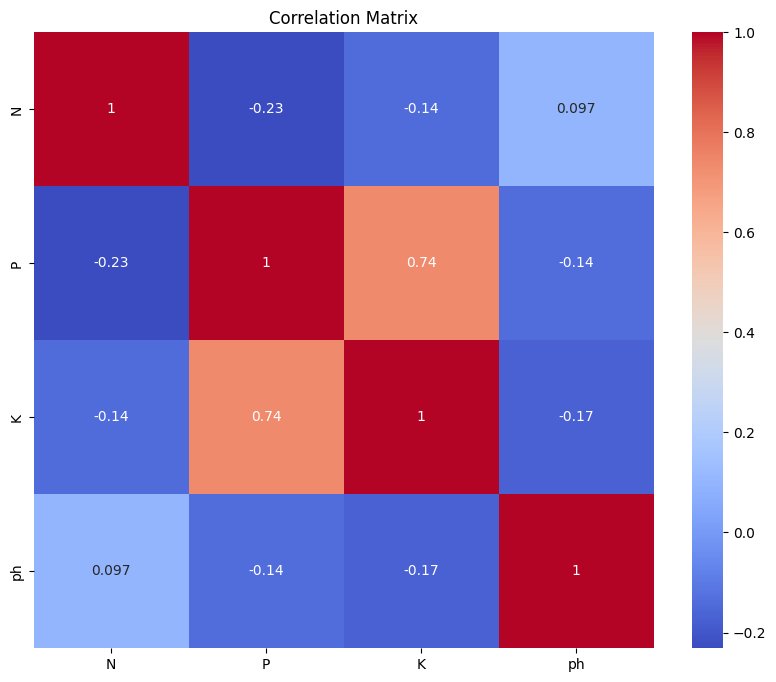

In [5]:
# analyze relationships between numeric variables
import seaborn as sns

corr_matrix = crops[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Check for crop types

In [6]:
# Print unique values of crop column
print(crops['crop'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


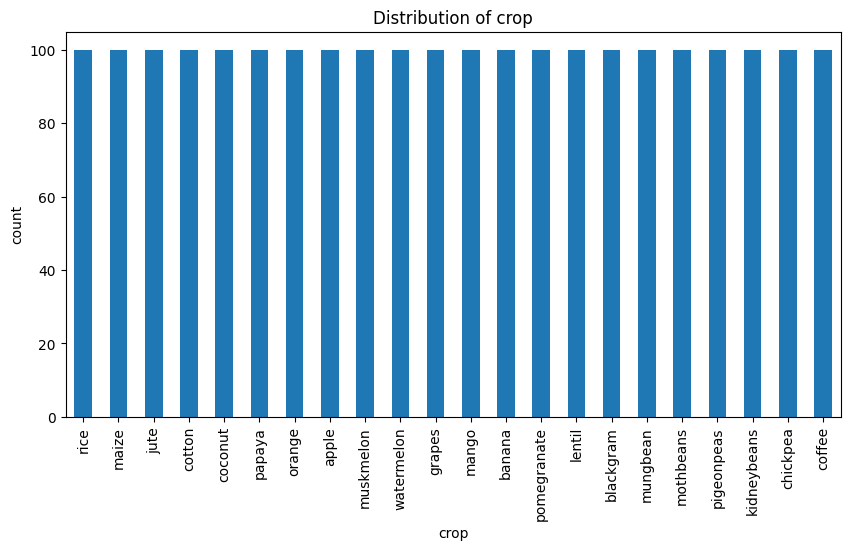

In [7]:
# visualize the frequency of categories
cat_columns = crops.select_dtypes(include=['object']).columns

for col in cat_columns:
    plt.figure(figsize=(10, 5))
    crops[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

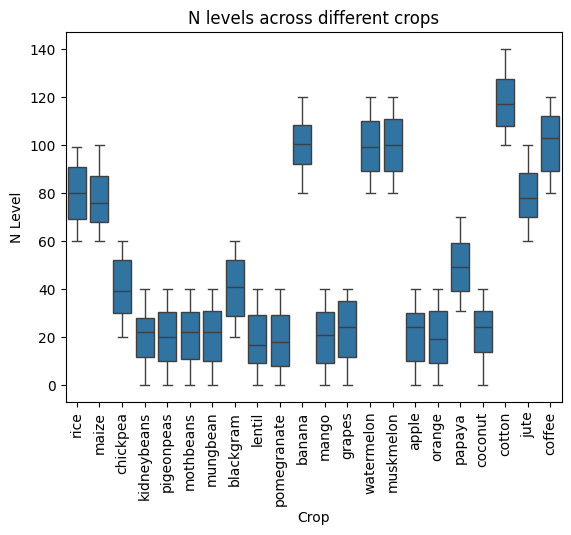

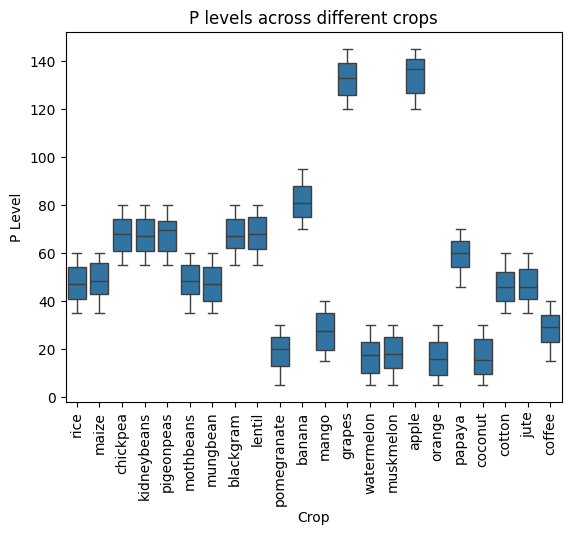

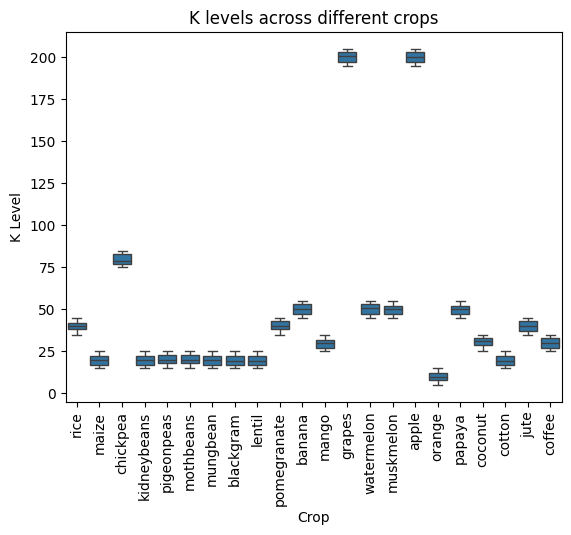

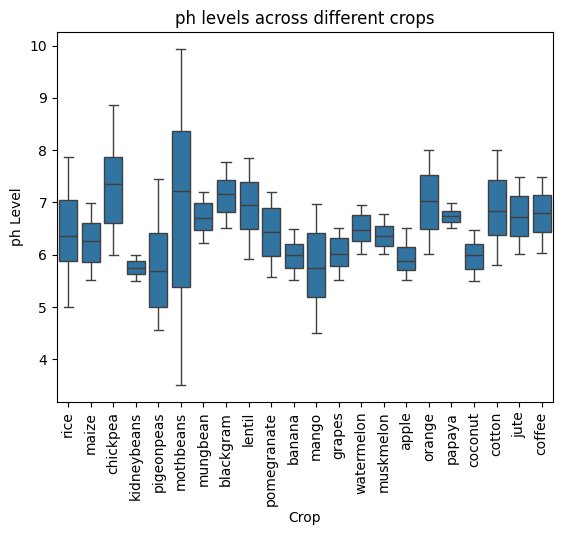

In [8]:
# Discover the distribution of numerical columns for each category of 'crop'

# List of numerical columns
numerical_cols = ['N', 'P', 'K', 'ph']

# Plotting boxplots for each numerical column grouped by 'crop'
for col in numerical_cols:
    sns.boxplot(data=crops, x='crop', y=col)
    plt.title(f'{col} levels across different crops')
    plt.xlabel('Crop')
    plt.ylabel(f'{col} Level')
    plt.xticks(rotation=90)
    plt.show()  # Add this line to display each plot separately

### Features and target variables

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = crops.drop('crop', axis=1)  # Drop the 'crop' column for features
y = crops['crop']  # Set 'crop' column as the target


### Use train_test_split()

In [10]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 4)
X_test shape: (440, 4)
y_train shape: (1760,)
y_test shape: (440,)


### Create a dictionary to store each features predictive performance

In [11]:
# Dictionary to store each feature's predictive performance
feature_performance = {}

In [12]:
# Define the feature columns
feature_columns = ['N', 'P', 'K', 'ph']

### Loop through the features and Train the model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loop through each feature
for feature in feature_columns:
    # Select only the current feature from the training and test sets
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    # Train a multi-class classifier (RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_feature, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test_feature)

    # Evaluate performance and store in dictionary
    accuracy = accuracy_score(y_test, y_pred)
    feature_performance[feature] = accuracy

### Evaluating the performance of each feature

In [14]:
# Display the performance of each feature
print("Feature Predictive Performance:")
for feature, performance in feature_performance.items():
    print(f"{feature}: {performance:.2f}")


Feature Predictive Performance:
N: 0.15
P: 0.21
K: 0.31
ph: 0.14


### Create the best_predictive_feature variable

In [15]:
# Create a dictionary for the best predictive feature
best_feature_name = max(feature_performance, key=feature_performance.get)
best_feature_score = feature_performance[best_feature_name]

# Create the dictionary
best_predictive_feature = {best_feature_name: best_feature_score}

In [16]:
# Display the dictionary
print(f"Best Predictive Feature: {best_predictive_feature}")

Best Predictive Feature: {'K': 0.3090909090909091}
